# REFACTORING THE CODE:

# IMPORTING LIBRARIES:

In [8]:
import pandas as pd                         # Importing pandas for data manipulation and analysis

import numpy as np                          # Importing numpy for numerical operations

import matplotlib.pyplot as plt             # Importing matplotlib for plotting graphs

from matplotlib.colors import ListedColormap  # Importing specific colormap functionality from matplotlib

import seaborn as sns                         # Importing seaborn for enhanced data visualization

from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and testing sets

from sklearn.preprocessing import StandardScaler      # Importing StandardScaler for feature scaling

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Importing metrics for evaluating model performance

from sklearn.ensemble import GradientBoostingClassifier  # Importing GradientBoostingClassifier for classification tasks

import joblib  # Importing joblib for model serialization and deserialization

import logging  # Importing logging for logging information during the execution

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Libraries imported successfully.')  # Logging information that libraries have been imported successfully


2024-06-15 15:47:26,715 - INFO - Libraries imported successfully.


# DATA HANDLER:

In [9]:
class DataHandler:
    def __init__(self, historical_data_path, latest_data_path=None):
        """
        Initializes the DataHandler with paths to the historical and latest data files.

        Parameters:
        historical_data_path (str): Path to the historical data CSV file.
        latest_data_path (str): Path to the latest data CSV file (optional).
        """
        self.historical_data_path = historical_data_path
        self.latest_data_path = latest_data_path
        self.historical_data = None  # Placeholder for historical data
        self.latest_data = None  # Placeholder for latest data

        
    def load_data(self):
        """
        Loads the historical and latest data from CSV files into pandas DataFrames.
        Handles exceptions for file not found, empty data, and other errors.
        """
        try:
            # Load historical data from CSV file
            self.historical_data = pd.read_csv(self.historical_data_path)
            logging.info(f'Historical data loaded successfully from {self.historical_data_path}')
        except FileNotFoundError as e:
            logging.error(f'File not found: {e}')
            self.historical_data = pd.DataFrame()  # Set as empty DataFrame on error
        except pd.errors.EmptyDataError as e:
            logging.error(f'Empty data error: {e}')
            self.historical_data = pd.DataFrame()  # Set as empty DataFrame on error
        except Exception as e:
            logging.error(f'An error occurred: {e}')
            self.historical_data = pd.DataFrame()  # Set as empty DataFrame on error

        if self.latest_data_path:
            try:
                # Load latest senor data from CSV file
                self.latest_data = pd.read_csv(self.latest_data_path)
                logging.info(f'Latest data loaded successfully from {self.latest_data_path}')
            except FileNotFoundError as e:
                logging.error(f'File not found: {e}')
                self.latest_data = pd.DataFrame()  # Set as empty DataFrame on error
            except pd.errors.EmptyDataError as e:
                logging.error(f'Empty data error: {e}')
                self.latest_data = pd.DataFrame()  # Set as empty DataFrame on error
            except Exception as e:
                logging.error(f'An error occurred: {e}')
                self.latest_data = pd.DataFrame()  # Set as empty DataFrame on error


# DATA PROCESSOR:

In [10]:
class DataPreprocessor:
    def __init__(self, data):
        """
        Initializes the DataPreprocessor with the dataset.

        Parameters:
        data (pd.DataFrame): The dataset to be preprocessed.
        """
        self.data = data
        self.scaled_data = None  # Placeholder for scaled data
        self.scaler = StandardScaler()  # StandardScaler instance for feature scaling

    def preprocess(self):
        """
        Preprocesses the data by scaling features using StandardScaler.
        
        Returns:
        np.ndarray: Scaled feature data or None if the input data is empty.
        """
        if self.data.empty:
            logging.error('No data to preprocess')
            return None
        
        # Drop the 'label' column to separate features from the target
        features = self.data.drop('label', axis=1)
        # Fit the scaler to the features and transform them
        self.scaled_data = self.scaler.fit_transform(features)
        logging.info('Data preprocessing complete')
        return self.scaled_data

    def save_scaler(self, filepath='scaler.pkl'):
        """
        Saves the fitted scaler to a file.

        Parameters:
        filepath (str): The path to save the scaler object. Default is 'scaler.pkl'.
        """
        joblib.dump(self.scaler, filepath)
        logging.info(f'Scaler saved to {filepath}')



# MODEL TRAINER

In [11]:
class ModelTrainer:
    def __init__(self, model, X, y):
        """
        Initializes the ModelTrainer with the model and dataset.

        Parameters:
        model (sklearn estimator): The machine learning model to be trained.
        X (pd.DataFrame or np.ndarray): The feature data.
        y (pd.Series or np.ndarray): The target labels.
        """
        self.model = model
        # Split the data into training and testing sets (80% training, 20% testing)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train(self):
        """
        Trains the model using the training data.
        """
        self.model.fit(self.X_train, self.y_train)
        logging.info('Model training complete')

    def save_model(self, filepath='model.pkl'):
        """
        Saves the trained model to a file.

        Parameters:
        filepath (str): The path to save the model. Default is 'model.pkl'.
        """
        joblib.dump(self.model, filepath)
        logging.info(f'Model saved to {filepath}')


# Model Evaluator

In [12]:
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        """
        Initializes the ModelEvaluator with the model and test data.

        Parameters:
        model (sklearn estimator): The trained machine learning model to be evaluated.
        X_test (pd.DataFrame or np.ndarray): The feature data for testing.
        y_test (pd.Series or np.ndarray): The true labels for the test data.
        """
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def evaluate(self):
        """
        Evaluates the model using the test data.

        Returns:
        tuple: A tuple containing accuracy, confusion matrix, and classification report.
        """
        # Predict the labels for the test data
        y_pred = self.model.predict(self.X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        
        # Generate confusion matrix
        confusion = confusion_matrix(self.y_test, y_pred)
        
        # Generate classification report
        report = classification_report(self.y_test, y_pred)
        
        # Log evaluation metrics
        logging.info(f'Accuracy: {accuracy}')
        logging.info(f'Confusion Matrix:\n{confusion}')
        logging.info(f'Classification Report:\n{report}')
        
        return accuracy, confusion, report

    def plot_confusion_matrix(self, confusion):
        """
        Plots the confusion matrix.

        Parameters:
        confusion (np.ndarray): The confusion matrix to be plotted.
        """
        plt.figure(figsize=(10, 7))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()


# Model Predictor

In [13]:
class Predictor:
    def __init__(self, model, scaler, latest_data):
        """
        Initializes the Predictor with the model, scaler, and latest data.

        Parameters:
        model (sklearn estimator): The trained machine learning model.
        scaler (StandardScaler): The scaler used for feature scaling.
        latest_data (pd.DataFrame): The latest dataset to be used for predictions.
        """
        self.model = model
        self.scaler = scaler
        self.latest_data = latest_data

    def make_predictions(self):
        """
        Makes predictions on the latest data using the trained model.

        Returns:
        np.ndarray: The predictions made by the model.
        """
        # Scale the latest data using the provided scaler
        scaled_data = self.scaler.transform(self.latest_data)
        # Make predictions using the model
        predictions = self.model.predict(scaled_data)
        return predictions

    def plot_predictions(self, predictions):
        """
        Plots the predictions made by the model on the latest data.

        Parameters:
        predictions (np.ndarray): The predictions made by the model.
        """
        # Add predictions to the latest data DataFrame
        self.latest_data['predictions'] = predictions
        
        # Define a custom colormap for the plot
        cm_bright = ListedColormap(['#FF0000', '#00FF00'])
        
        # Create a KDE plot for each class
        plt.figure(figsize=(10, 6))
        sns.kdeplot(x=self.latest_data[self.latest_data['predictions'] == 0]['sensor_1'],
                    y=self.latest_data[self.latest_data['predictions'] == 0]['sensor_2'],
                    fill=True, cmap="Reds", alpha=0.7, label="Class 0 = Red")
        sns.kdeplot(x=self.latest_data[self.latest_data['predictions'] == 1]['sensor_1'],
                    y=self.latest_data[self.latest_data['predictions'] == 1]['sensor_2'],
                    fill=True, cmap="Greens", alpha=0.7, label="Class 1 = Green")
        
        # Scatter plot for the predictions
        plt.scatter(self.latest_data['sensor_1'], self.latest_data['sensor_2'], 
                    c=self.latest_data['predictions'], cmap=cm_bright, edgecolors='k', s=25)
        
        # Set plot title and legend
        plt.title('Classifier Output on Latest Data')
        plt.legend()
        plt.show()


# EXAMPLE USAGE:

2024-06-15 15:49:18,108 - INFO - Historical data loaded successfully from data/historical_sensor_data.csv
2024-06-15 15:49:18,114 - INFO - Latest data loaded successfully from data/latest_sensor_data.csv
2024-06-15 15:49:18,122 - INFO - Data preprocessing complete
2024-06-15 15:49:18,122 - INFO - Scaler saved to scaler.pkl
2024-06-15 15:49:18,315 - INFO - Model training complete
2024-06-15 15:49:18,327 - INFO - Model saved to model.pkl
2024-06-15 15:49:18,343 - INFO - Accuracy: 0.98
2024-06-15 15:49:18,344 - INFO - Confusion Matrix:
[[125   3]
 [  3 169]]
2024-06-15 15:49:18,344 - INFO - Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.98      0.98      0.98       172

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



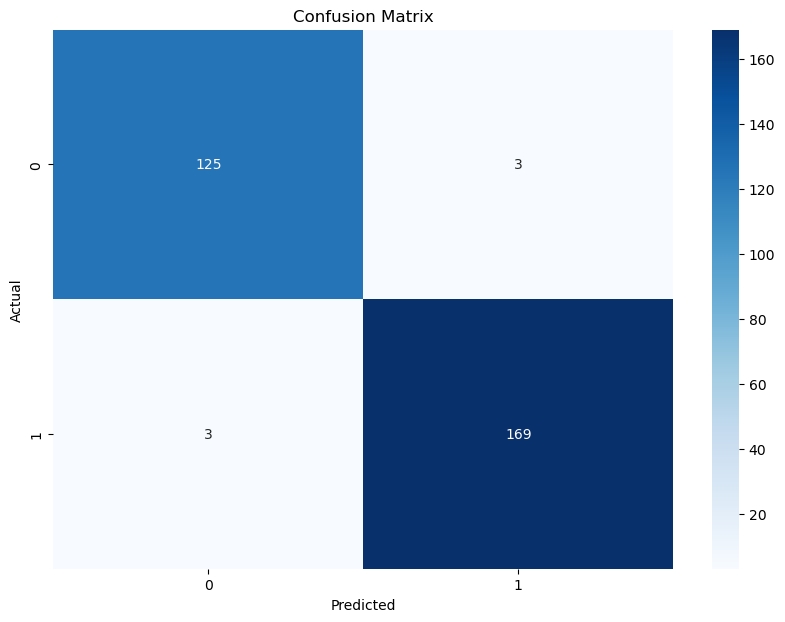

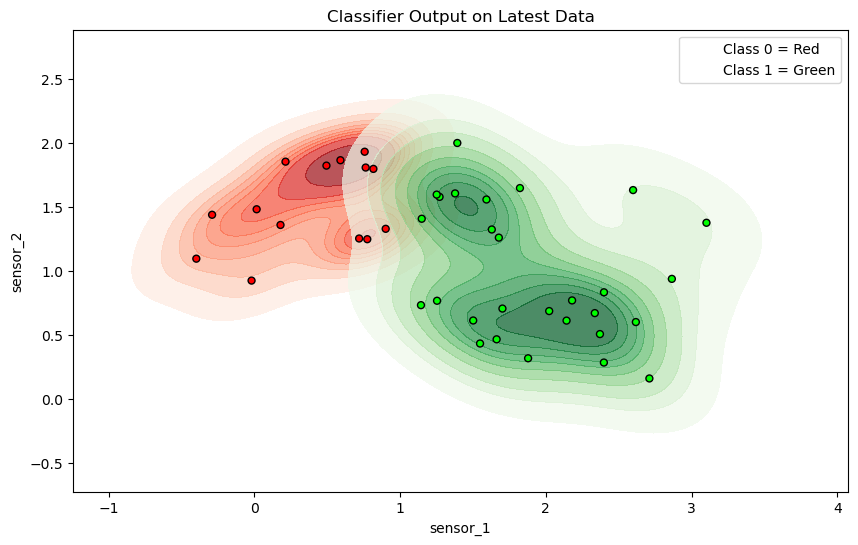

In [16]:

data_handler = DataHandler('data/historical_sensor_data.csv', 'data/latest_sensor_data.csv')
data_handler.load_data()

if not data_handler.historical_data.empty:
    preprocessor = DataPreprocessor(data_handler.historical_data)
    X = preprocessor.preprocess()
    y = data_handler.historical_data['label']
    preprocessor.save_scaler()

    model = GradientBoostingClassifier()
    trainer = ModelTrainer(model, X, y)
    trainer.train()
    trainer.save_model()

    evaluator = ModelEvaluator(model, trainer.X_test, trainer.y_test)
    accuracy, confusion, report = evaluator.evaluate()
    evaluator.plot_confusion_matrix(confusion)

    latest_data = pd.read_csv('data/latest_sensor_data.csv')
    predictor = Predictor(model, preprocessor.scaler, latest_data)
    predictions = predictor.make_predictions()
    predictor.plot_predictions(predictions)